# UCAS data analysis

---

## Context

[Map POLAR4](https://tableau.hefce.ac.uk/t/Public/views/InteractivemapMarch2021/POLAR4)

[Map Index of Multiple
Deprivation 2019](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/833959/IoD2019_Infographic.pdf)

Information about POLAR4

<details>
    
- Sources: 
    - https://www.officeforstudents.org.uk/data-and-analysis/young-participation-by-area/about-polar-and-adult-he/
    - https://www.officeforstudents.org.uk/media/cd78246d-0072-4e2f-a25a-42ba54deea11/polar-and-tundra-faqs-september2020.pdf
    
- The young participation rate is calculated by dividing the number of young people from each area who enter higher education aged 18 or 19 by the young population of that area. POLAR4 was calculated using data on students who begun their studies between 2009-10 and 2013-14. The areas are then ranked by participation rate and split into five quintiles, each of which represents about a fifth of the young population. POLAR4 does not limit the student population by school type and does not track individual students. 
    
- Area-based measures can be used:
    - to compare areas across the UK
    - to identify areas with the lowest young participation in higher education
    - to evaluate whether gaps in participation have changed year on year
    - to compare relative levels of participation in higher education across the UK
    - as part of an assessment of the background of an individual. When making background assessments these measures should never be used alone and only with other information.
    
- [...] most people are more likely to enter higher education when they are young. The biggest single year of age in higher education are those who enter aged 18, and more than half of undergraduate entrants and over two-thirds of full-time undergraduate entrants are under 21. [...] Mature participation is important, but needs a different approach, considering the proportion of the population that already have a higher education qualification.

- The original research for POLAR showed that, in many parts of the UK, low participation areas were also the areas with the highest measures of socio-economic disadvantage, but this was not the only factor in determining participation in higher education. Other factors that influence the level of young participation in an area include:
    - the ethnicity profile of the area
    - the adult education level amongst the population
    - the relative school outcomes of the area
    - the availability of local, accessible higher education places
    - the availability of alternative post-school pathways.
    
- London is the region of the UK with the highest number of small areas that are simultaneously classified as deprived using the Index of Multiple Deprivation (IMD), and [not classified as low participation](https://www.ucas.com/file/65656/download?token=VgsvkzN7) using POLAR4 or TUNDRA.

- [...] area-based measures are not a measure of socio-economic disadvantage, of either the individual or of areas.

- For an area based measure such as POLAR, this may mean that participation rates for state school may be masked by higher participation rates of independent schools in the area. For outreach and access and participation programmes, this masking may mean that certain areas could be excluded from potential funding and opportunities. TUNDRA’s purpose is to reveal such areas.
    
</details>

Observations:
- Apart from London, areas with least participation (POLAR4 and TUNDRA) are correlated with most deprived areas (IMD) 
- Reference points: universities that appear close (±5) to UoB on [at least 2 rankings](https://en.wikipedia.org/wiki/Rankings_of_universities_in_the_United_Kingdom) (the ones marked with \* are within ±3 places):
    - University of Manchester *
    - University of Sheffield *
    - University of East Anglia *
    - Queen's University Belfast
    - University of Exeter
    - University of Nottingham 
    - Heriot-Watt University
- Models: universities that are 5-10 places higher on at least 2 rankings: 
    - King's College London
    - University of York

Information on UoB's WP efforts:
- some criticism of UoB for slashing budgets on WP efforts in recent years: https://nitter.pussthecat.org/PrecariousBrum/status/1268135554815844353

---

## Exploratory

In [743]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn
sns.set_theme()
import altair as alt

In [725]:
%matplotlib inline

In [726]:
data = pd.read_csv('./UCAS_data_file.csv')

In [727]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386856 entries, 0 to 386855
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inst_all            386856 non-null  object 
 1   INSTITUTION_CODE    386856 non-null  object 
 2   Cycle               386856 non-null  int64  
 3   statistic           386856 non-null  object 
 4   equality_dimension  386856 non-null  object 
 5   agegroup            386856 non-null  object 
 6   value               379723 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.7+ MB


In [728]:
# profile = ProfileReport(data, title="Pandas Profiling Report")
# profile

The profile generated by `pandas-profiling` tells us the following:

- `inst_all` and `INSTITUTION_CODE` have a high cardinality: 132 distinct values 
- `Cycle` is a time period (year)
- high correlation between `statistic` and `agegroup`
- `value` has 7133 (1.8%) missing values 
- `value` has 4606 (1.2%) zeros 

---

## Data cleaning

Let's have a closer look at the columns we're working with.

In [729]:
for i in data.columns[2:-1]:
    print(
        f'Unique values for {i}:\n'
        f'\t{data[i].unique()}\n'
    )

Unique values for Cycle:
	[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]

Unique values for statistic:
	['June deadline applicants' 'Placed June deadline applicants'
 'All placed applicants' 'June deadline applicants per 10,000 population'
 'Placed June deadline applicants per 10,000 population'
 'All placed applicants per 10,000 population'
 'June deadline applications' 'Offers' 'Offer rate' 'Average offer rate'
 'Percentage point difference between offer rate and average offer rate'
 'Contribution of group to the average offer rate']

Unique values for equality_dimension:
	['Total' 'White ethnic group' 'Black ethnic group' 'Asian ethnic group'
 'Mixed ethnic group' 'Other ethnic group' 'POLAR4 Q1' 'POLAR4 Q2'
 'POLAR4 Q3' 'POLAR4 Q4' 'POLAR4 Q5' 'SIMD 2016 Q1' 'SIMD 2016 Q2'
 'SIMD 2016 Q3' 'SIMD 2016 Q4' 'SIMD 2016 Q5' 'Men' 'Women']

Unique values for agegroup:
	['18 year olds' 'All ages']



### `inst_all` and `INSTITUTION_CODE`

We know that `inst_all` might be codified by `INSTITUTION_CODE`: after checking that, we drop `INSTITUTION_CODE`. 

In [730]:
data[['inst_all', 'INSTITUTION_CODE']]

,inst_all,INSTITUTION_CODE
0,A20 University of Aberdeen,A20
1,A20 University of Aberdeen,A20
2,A20 University of Aberdeen,A20
3,A20 University of Aberdeen,A20
4,A20 University of Aberdeen,A20
...,...,...
386851,Y75 York St John University,Y75
386852,Y75 York St John University,Y75
386853,Y75 York St John University,Y75
386854,Y75 York St John University,Y75


In [731]:
all(data['inst_all'].apply(lambda x: x[:3]) == data['INSTITUTION_CODE'])

True

In [732]:
data = data.drop(columns='INSTITUTION_CODE')

---

### `value`

#### Negative values

Let's look at `value`. 

In [733]:
data['value'].describe()

count    379723.000000
mean       1311.430507
std        3253.198768
min         -22.700000
25%           0.902000
50%         110.800000
75%        1030.000000
max       56355.000000
Name: value, dtype: float64

We can see that the minimum is negative, which means that there are some negative values in this column. It looks like an input error (we're counting people after all), let's check. 

In [734]:
data.loc[data['value'] < 0]['statistic'].unique()

array(['Percentage point difference between offer rate and average offer rate'],
      dtype=object)

The only negative values refer to a negative percentage point difference between offer rate and average offer rate: this is not an error. 

---

#### Null values

We know that there's a small amount of null values: it's probable that most of these values aren't missing but simply null (no applicants of `Asian ethnic group` in a given year, for example), but we want to check whether missing values are limited to a single university or specific columns. 

In [735]:
data_null = data.loc[data["value"] == 0]

for i in data_null.columns[:-1]:
    print(
        f'Unique values for {i}:\n'
        f'\t{data_null[i].unique()}\n'
    )

Unique values for inst_all:
	['A20 University of Aberdeen' 'A30 Abertay University'
 'A40 Aberystwyth University' 'A60 Anglia Ruskin University'
 'A66 Arts University Bournemouth' 'A80 Aston University Birmingham'
 'B06 Bangor University' 'B16 University of Bath'
 'B20 Bath Spa University' 'B22 University of Bedfordshire'
 'B25 Birmingham City University' 'B35 University College Birmingham'
 'B38 Bishop Grosseteste University' 'B44 University of Bolton'
 'B50 Bournemouth University' 'B56 University of Bradford'
 'B72 University of Brighton' 'B78 University of Bristol'
 'B80 Bristol University of the West of England'
 'B84 Brunel University London' 'B94 Buckinghamshire New University'
 'C05 University of Cambridge' 'C10 Canterbury Christ Church University'
 'C15 Cardiff University' 'C20 Cardiff Metropolitan University'
 'C30 University of Central Lancashire' 'C55 University of Chester'
 'C58 University of Chichester' 'C60 City University of London'
 'C85 Coventry University' 'C93 Univer

Doesn't seem like the problem is with a single university. 

Let's check whether any university has all null values:

In [736]:
data.groupby('inst_all').max()['value'].apply(int).sort_values().reset_index()

,inst_all,value
0,P65 Plymouth College of Art,1410
1,B38 Bishop Grosseteste University,2080
2,G53 Glyndwr University Wrexham,2350
3,H12 Harper Adams University,3070
4,N39 Norwich University of the Arts,3160
...,...,...
127,N84 University of Nottingham,46325
128,S21 Sheffield Hallam University,47990
129,L23 University of Leeds,50155
130,M40 Manchester Metropolitan University,54965


In [737]:
data.groupby(['Cycle', 'inst_all']).max()\
.reset_index().reindex(columns=['inst_all', 'Cycle', 'value'])\
.sort_values(['value', 'inst_all', 'Cycle'])\
.loc[lambda x: x['value'] == 0]

,inst_all,Cycle,value
4,A66 Arts University Bournemouth,2010,0.0
123,W01 University of South Wales,2010,0.0
255,W01 University of South Wales,2011,0.0
387,W01 University of South Wales,2012,0.0
519,W01 University of South Wales,2013,0.0
124,W05 University of West London,2010,0.0
256,W05 University of West London,2011,0.0


We can see that A66, W01, and W05 seemingly are missing some values for the first few years of the dataset: we could drop only the missing years, but, given that these 3 universities represent a very small part of the data, we can afford to drop them entirely without it affecting our analysis. 

In [738]:
data = data.loc[
    ~data['inst_all'].str.startswith('A66')
    & ~data['inst_all'].str.startswith('W01')
    & ~data['inst_all'].str.startswith('W05')
]

---

#### Missing values

We also know that there are some missing values. 

In [739]:
data_na = data.loc[data['value'].isna()]

for i in data_na.columns[:-1]:
    print(
        f'Unique values for {i}:\n'
        f'\t{data_na[i].unique()}\n'
    )

Unique values for inst_all:
	['A20 University of Aberdeen' 'A30 Abertay University'
 'A40 Aberystwyth University' 'A60 Anglia Ruskin University'
 'A80 Aston University Birmingham' 'B06 Bangor University'
 'B16 University of Bath' 'B20 Bath Spa University'
 'B22 University of Bedfordshire' 'B25 Birmingham City University'
 'B32 University of Birmingham' 'B35 University College Birmingham'
 'B38 Bishop Grosseteste University' 'B44 University of Bolton'
 'B50 Bournemouth University' 'B56 University of Bradford'
 'B72 University of Brighton' 'B78 University of Bristol'
 'B80 Bristol University of the West of England'
 'B84 Brunel University London' 'B94 Buckinghamshire New University'
 'C05 University of Cambridge' 'C10 Canterbury Christ Church University'
 'C15 Cardiff University' 'C20 Cardiff Metropolitan University'
 'C30 University of Central Lancashire' 'C55 University of Chester'
 'C58 University of Chichester' 'C60 City University of London'
 'C85 Coventry University' 'C93 Universit

The missing values can be found in all universities, but are limited to the `statistic` values `Average offer rate`, `Percentage point difference between offer rate and average offer rate`, `Contribution of group to the average offer rate`, and `Offer rate`. 

In theory, these missing values can be determined from the data. For example, after reading the UCAS dataset guidelines and playing with the values, we determine the following:

- $\text{Offer rate} = \frac{\text{Offers}}{\text{June deadline applicants}}$

- $\text{Percentage point difference between offer rate and average offer rate} = \text{(Offer rate - Average offer rate)} * 100$

However, we'll leave the missing values for now, as we're unlikely to be looking into them in our analysis. 

---

### `agegroup`

Let's check whether we can afford looking at 18 year olds only. 

If `18 years old` represents the majority of values, we can drop the `All ages` rows. 

In [740]:
# create dataframe that contains totals for each statistic
# and only the absolute values (we drop rates, percentages, etc.)
agegroup_data = data.loc[
    (data['equality_dimension'] == 'Total')
    & (~data['statistic'].str.contains('|'.join(['per 10', 'rate', 'percent'])))
].drop(
    columns='equality_dimension'
)

# create separate dataframes for `18 years old` and `All ages`
agegroup_18_data = agegroup_data.loc[agegroup_data['agegroup'] == '18 year olds'].drop(columns='agegroup')
agegroup_all_data = agegroup_data.loc[agegroup_data['agegroup'] != '18 year olds'].drop(columns='agegroup')

# merge the above dataframes (left join on non-value columns)
agegroups_data = pd.merge(
    agegroup_18_data,
    agegroup_all_data,
    how='right',
    left_on=['inst_all', 'Cycle', 'statistic'],
    right_on=['inst_all', 'Cycle', 'statistic'],
    suffixes=('_18yo', '_all')
)

# create column with ratio of `18 years old` compared to `All ages`
agegroups_data['18yo_proportion'] = agegroups_data['value_18yo'] / agegroups_data['value_all']

agegroups_data.sort_values('18yo_proportion')

,inst_all,Cycle,statistic,value_18yo,value_all,18yo_proportion
513,B22 University of Bedfordshire,2019,All placed applicants,470.0,4685.0,0.100320
2853,G53 Glyndwr University Wrexham,2019,All placed applicants,90.0,800.0,0.112500
2852,G53 Glyndwr University Wrexham,2018,All placed applicants,90.0,785.0,0.114650
1234,B94 Buckinghamshire New University,2020,All placed applicants,340.0,2960.0,0.114865
6694,S82 University of Suffolk,2020,All placed applicants,345.0,2965.0,0.116358
...,...,...,...,...,...,...
7378,W20 University of Warwick,2020,Offers,15240.0,17350.0,0.878386
3394,I50 Imperial College London,2020,All placed applicants,1465.0,1660.0,0.882530
3417,I50 Imperial College London,2019,Offers,3455.0,3910.0,0.883632
3418,I50 Imperial College London,2020,Offers,3700.0,4180.0,0.885167


<AxesSubplot:xlabel='18yo_proportion', ylabel='Percent'>

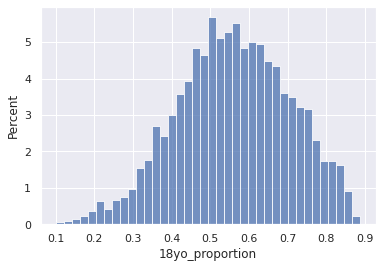

In [744]:
# histogram of proportion of 18yo for `statistic` measures
sns.histplot(data=agegroups_data.dropna()['18yo_proportion'], stat='percent')

It seems that, for most `statistic` measures, `18 years old` represents 40-70% of `All ages`. 

We'll lose a large amount of information by only looking at 18yo applicants. However, the data task specifically requires to advise UoB on the effects of WP policies on the participation of Year 13 students, which are largely 18yo. Moreover, [OfS states](https://www.officeforstudents.org.uk/media/cd78246d-0072-4e2f-a25a-42ba54deea11/polar-and-tundra-faqs-september2020.pdf) that "The biggest single year of age in higher education are those who enter aged 18 [...] Mature participation is important, but needs a different approach, considering the proportion of the population that already have a higher education qualification."

Consequently, we drop `All ages` and only focus on `18 year olds`. 

In [745]:
data = data.loc[data['agegroup'] != 'All ages'].reset_index(drop=True)

---

### `equality_dimension`

Let's have a closer look at the `equality_dimension` column. 

In [746]:
# abs_rows = [row for row in data['equality_dimension'].unique() if all(match not in row for match in ['per 10', 'rate', 'percent'])]

ethnicity_cols = [col for col in data['equality_dimension'].unique() if 'ethnic' in col]
gender_cols = [col for col in data['equality_dimension'].unique() if 'en' in col]
polar_cols = [col for col in data['equality_dimension'].unique() if 'POLAR' in col]

print(
    f'ethnicity_cols:\n\t{ethnicity_cols}\n\n'
    f'gender_cols:\n\t{gender_cols}\n\n'
    f'polar_cols:\n\t{polar_cols}\n\n'
)

ethnicity_cols:
	['White ethnic group', 'Black ethnic group', 'Asian ethnic group', 'Mixed ethnic group', 'Other ethnic group']

gender_cols:
	['Men', 'Women']

polar_cols:
	['POLAR4 Q1', 'POLAR4 Q2', 'POLAR4 Q3', 'POLAR4 Q4', 'POLAR4 Q5']




The `equality_dimension` column splits the students along various axes, namely POLAR4, ethnicity, and sex. 

The data task specifically requires to look at Widening Participation efforts with respect to POLAR4 and IMD criteria. Consequently, we will drop the information relating to ethnicity and sex. 

In [747]:
data = data.loc[data['equality_dimension'].isin(polar_cols)]

### `statistic`

In [748]:
data['statistic'].unique()

array(['June deadline applicants', 'Placed June deadline applicants',
       'All placed applicants',
       'June deadline applicants per 10,000 population',
       'Placed June deadline applicants per 10,000 population',
       'All placed applicants per 10,000 population',
       'June deadline applications', 'Offers', 'Offer rate',
       'Average offer rate',
       'Percentage point difference between offer rate and average offer rate',
       'Contribution of group to the average offer rate'], dtype=object)

We won't touch the `statistic` column for now, but wait until we know what we want to be looking at.

In [755]:
data.to_csv('./data_clean.csv')

## Data analysis

### UoB

We are working with `University of Birmingham`. 

In [749]:
# unique values in `inst_all` that contain 'University of Birmingham'
data[data['inst_all'].str.contains('University of Birmingham', case=False)]['inst_all'].unique()

array(['B32 University of Birmingham'], dtype=object)

### Reference points and model universities

We identified several universities that are similar enough to University of Birmingham to serve as reference points. 

Our methodology for achieving this was quite crude: we identified universities that appeared close to University of Birmingham in the [3 main rankings of UK universities for 2022](https://en.wikipedia.org/wiki/Rankings_of_universities_in_the_United_Kingdom). This is not perfect, as, for example, UoB has dropped many places in 2022 on [at least one of the rankings](https://www.thecompleteuniversityguide.co.uk/universities/university-of-birmingham#subSec_leaguetableperformance) and one of our model universities is in London, which is a [major outlier in the UK in terms of POLAR4 quintiles](https://www.ucas.com/file/65656/download?token=VgsvkzN7). However, [cross-checking with other sources](https://www.universityrankings.ch/compare?id[]=5256&id[]=5288&id[]=5267&id[]=5321&id[]=5300&global=all) does not uncover any major issues with our picks: we will consider this sufficient for the current exploratory analysis, given the time constraints. 

Our reference points are universities that appear close (±3) to UoB on [at least 2 out of 3 rankings](https://en.wikipedia.org/wiki/Rankings_of_universities_in_the_United_Kingdom):
- University of Manchester
- University of Sheffield
- University of East Anglia

In [750]:
data[data['inst_all'].str.contains(
    '|'.join(['University of Manchester', 'University of Sheffield', 'University of East Anglia']), 
    case=False
)]['inst_all'].unique()

array(['E14 University of East Anglia UEA',
       'M20 University of Manchester', 'S18 University of Sheffield'],
      dtype=object)

We have also identified models (universities that are 5-10 places higher on at least 2 out of 3 rankings): 
- King's College London
- University of York

In [751]:
data[data['inst_all'].str.contains(
    '|'.join(["King.?s College London", 'University of York']), 
    case=False
)]['inst_all'].unique()

array(['K60 Kings College London University of London',
       'Y50 University of York'], dtype=object)

### `universities_data`

Let's create the dataframe that will hold the data we want to look at: the POLAR4 data for our 6 universities over 2010-2021. 

In [752]:
# create df with UoB, the reference universities, and the model ones
universities_data = data[data['inst_all'].str.contains(
    '|'.join(['B32', 'M20', 'E14', 'S18', 'K60', 'Y50']), 
    case=False
)]

Let's check that there's no missing data among our reference points and models. 

In [753]:
any(universities_data['value'].isna())

False

No missing data: we continue.

Now that we're working with a small number of universities, we can afford to pivot the dataframe to a more meaningful form, just to have a better understanding of what features of the data we want to be exploring. 

In [756]:
universities_data.pivot_table(
    index=['inst_all', 'statistic', 'equality_dimension'],
    columns='Cycle',
    values='value'
)

Cycle                                                                                                 2010  \
inst_all                     statistic                                          equality_dimension           
B32 University of Birmingham All placed applicants                              POLAR4 Q1            200.0   
                                                                                POLAR4 Q2            345.0   
                                                                                POLAR4 Q3            575.0   
                                                                                POLAR4 Q4            760.0   
                                                                                POLAR4 Q5           1620.0   
...                                                                                                    ...   
Y50 University of York       Placed June deadline applicants per 10,000 popu... POLAR4 Q1              8.7   
                                                                                POLAR4 Q2             16.0   
                                                                                POLAR4 Q3             22.7   
                                                                                POLAR4 Q4             29.9   
                                                                                POLAR4 Q5             48.0   

Cycle                                                                                                 2011  \
inst_all                     statistic                                          equality_dimension           
B32 University of Birmingham All placed applicants                              POLAR4 Q1            195.0   
                                                                                POLAR4 Q2            380.0   
                                                                                POLAR4 Q3            610.0   
                                                                                POLAR4 Q4            720.0   
                                                                                POLAR4 Q5           1665.0   
...                                                                                                    ...   
Y50 University of York       Placed June deadline applicants per 10,000 popu... POLAR4 Q1              8.1   
                                                                                POLAR4 Q2             14.4   
                                                                                POLAR4 Q3             20.4   
                                                                                POLAR4 Q4             28.3   
                                                                                POLAR4 Q5             48.8   

Cycle                                                                                                 2012  \
inst_all                     statistic                                          equality_dimension           
B32 University of Birmingham All placed applicants                              POLAR4 Q1            210.0   
                                                                                POLAR4 Q2            375.0   
                                                                                POLAR4 Q3            625.0   
                                                                                POLAR4 Q4            740.0   
                                                                                POLAR4 Q5           1625.0   
...                                                                                                    ...   
Y50 University of York       Placed June deadline applicants per 10,000 popu... POLAR4 Q1              9.3   
                                                                                POLAR4 Q2             16.6   
                                      

Let's make some visualisations. 

### `POLAR4` depending on various `statistic` values

We want to look at aspects of the data that are not already covered by UCAS [in their (very basic) reports](https://www.ucas.com/file/144876/download?token=hr_HRBqo#page=7). 

First, we need to prepare our dataframe for our visualisation library (altair). 

In [757]:
# altair requires datetime column for plotting time series
universities_data.loc[:, 'Cycle'] = pd.to_datetime(universities_data['Cycle'], format='%Y')

# altair requires a list of labels to sort faceted charts
universities_order = [
    'B32 University of Birmingham',
    'M20 University of Manchester',
    'E14 University of East Anglia UEA',
    'S18 University of Sheffield',
    'K60 Kings College London University of London',
    'Y50 University of York'
]

/tmp/ipykernel_36524/1009984407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  universities_data.loc[:, 'Cycle'] = pd.to_datetime(universities_data['Cycle'], format='%Y')


#### Offer rate

First, we'll look into the `Offer rate` depending on the POLAR4 quintile in our different universities. 

In [758]:
# create df with `Offer rate` data
offer_rate = universities_data[universities_data['statistic'] == 'Offer rate']

In [760]:
# plot offer rates in 2010-2021 by university (faceted line plot)
chart = alt.Chart(offer_rate)\
.mark_line(point=True)\
.encode(
    x=alt.X('Cycle:T', title='Year'),
    y=alt.Y('value:Q', title='Offer rate'),
    color=alt.Color('equality_dimension:N', title='POLAR4'),
    tooltip=(
        alt.Tooltip('inst_all:N', title='University'),
        alt.Tooltip('equality_dimension:N', title='POLAR4'),
        alt.Tooltip('value:Q', title='Offer rate'),
    )
)\
.facet(
    facet=alt.Facet('inst_all:N', title=None, sort=universities_order),
    columns=2,
    title={
        'text': 'Offer rate in 2010-2021 by university',
        'anchor': 'middle',
        'fontSize': 15,
        'dy': -10
    }
)

chart

alt.FacetChart(...)

**Main point: UoB has a historically wide and stagnating amplitude between offer rates for Q1 and Q5, while most other universities in our benchmark either have a narrow amplitude or are strongly improving.**

---

We notice that UoB has historically had a very wide amplitude between the offer rates for lower POLAR4 quintiles (Q1-Q3) and the higher ones (Q4-Q5). 

Indeed, the offer rates for Q5 in the considered period have been above 80%, sometimes as high as 90%. In contrast, the offer rates for Q1 (and Q2) have been below 70%, and close to 60%. Historically, we observe Q5 offer rates at 15-20 percentage points above those for Q1-Q2. 

Manchester has a similar amplitude and a similar track record to University of Birmingham. 

East Anglia, Sheffield, and King's College London all have much narrower offer rate ranges (~10 percentage points). York, while its track record is similar to UoB's, has been drastically improving since 2016. 

The trend of levelling offer rates across POLAR4 quintiles is much more noticeable, in general for our reference points and models (Q1 > Q5 for King's in 2021!), while UoB and Manchester are stagnating at very wide amplitudes. 

#### Placed June deadline applicants

Let's look at the absolute values for `Placed June deadline applicants`. 

We could be looking at `All placed applicants`, but `Offer rates` is calculated based on the number of `June deadline applications`, so it directly affects primarily the June deadline applicants. This population represents a vast majority of `All placed applicants` anyway. 

In [761]:
# create df with `Placed June deadline applicants` data
placed_applicants = universities_data[universities_data['statistic'] == 'Placed June deadline applicants']

In [762]:
# plot placed June deadline applicants in 2010-2021 by university (faceted stacked area plot)
chart = alt.Chart(placed_applicants)\
.mark_area(opacity=.8, stroke='white', strokeWidth=2)\
.encode(
    x=alt.X('Cycle:T', title='Year'),
    y=alt.Y('value:Q', title='Placed June deadline applicants (percentage)', stack='normalize'),
    color=alt.Color('equality_dimension:N', title='POLAR4'),
    tooltip=(
        alt.Tooltip('inst_all:N', title='University'),
        alt.Tooltip('equality_dimension:N', title='POLAR4'),
        alt.Tooltip('value:Q', title='Placed June deadline applicants'),
    )
)\
.facet(
    facet=alt.Facet('inst_all:N', title=None, sort=universities_order),
    columns=2,
    title={
        'text': 'Placed June deadline applicants in 2010-2021 by university',
        'anchor': 'middle',
        'fontSize': 15,
        'dy': -10
    }
)

chart

alt.FacetChart(...)

**Main point: University of Birmingham is average when it comes to the proportion of placed June deadline applicants from lower POLAR4 quintiles**


---

Here, we notice that the proportion of POLAR4 Q1 `Placed June deadline applicants` at University of Birmingham is relatively good compared to our benchmark universities, standing at ~10% of applicants across all POLAR4 quintiles. 

University of East Anglia does a bit better than the others for this metric, with ~12%, while King's College London does worse, with <5% (which is probably explained by the specificities of London applicants, who probably represent the majority of applications). 

The metric for quintiles Q1-Q3 is similarly good (relatively speaking) at UoB, at ~40% of all applicants. Yet again, East Anglia shines with ~50% of placed applicants in Q3 or lower, while King's lags behind for this metric at 30%. 

#### Conclusion

We observe that University of Birmingham has historically lagged behind on Widening Participation efforts compared to its peer universities (as identified by us) when looking at offer rates, which is one aspect of the application process that the university has arguably full control over. More specifically, the university has a very wide amplitude between its offer rates for higher and lower POLAR4 quintiles, and little improvement is to be noticed over time. In contrast, its peers either have much narrower amplitudes or have been starkly improving over the last decade. 

However, when looking at the outcomes of the process, UoB is average, with 10% and 40% of all June deadline applications being Q1 or ≤Q3, respectively. This metric is much more affected by external factors (ie where students choose to go). 

One potentially effective measure that UoB could implement to improve this would be to attempt to bring closer the gap between its offer rates to lower POLAR4 quintiles and the higher ones. We can assume (based on our current data analysis), that this could translate to much better outcomes in terms of Widening Participation for the university. 